In [20]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from collections import defaultdict
import ast 

In [2]:
df_flood = pd.read_csv('../scenario0_floodTrue_heavy_truckFalse.csv')
df_ht = pd.read_csv('../scenario0_floodFalse_heavy_truckTrue.csv')
df_1 = pd.read_csv('../scenario0_floodFalse_heavy_truckFalse.csv')
df_0 = pd.read_csv('../scenario1_floodFalse_heavy_truckFalse.csv')

In [3]:
df_flood.head(5)

,Scenario,Seed,Average_driving_time,Total_waiting_time,Average_waiting_time,Delay dict
0,0,592517,399.173327,2199723,255.544029,"{'10690': 200.82093616808453, '12109': 188.226..."
1,0,430382,424.059111,2328868,270.987666,"{'12013': 207.7230868285194, '10060': 173.8882..."
2,0,544967,444.748662,2517999,292.858688,"{'10278': 98.99706010399743, '12015': 95.02306..."
3,0,487543,428.645574,2390295,278.038269,"{'11557': 87.7963792202034, '12519': 86.572933..."
4,0,943789,529.972717,3392775,405.980017,"{'10062': 216.4412345767853, '11543': 180.0379..."


In [11]:
#histoplot the Average_driving_time
def histoplot(df, title):
    plt.figure(figsize=(10, 5))
    sns.histplot(df['Average_driving_time'], bins=10, kde=True)
    plt.title(title)
    plt.xlabel('Average Driving Time')
    plt.ylabel('Frequency')
    plt.grid()
    plt.show()

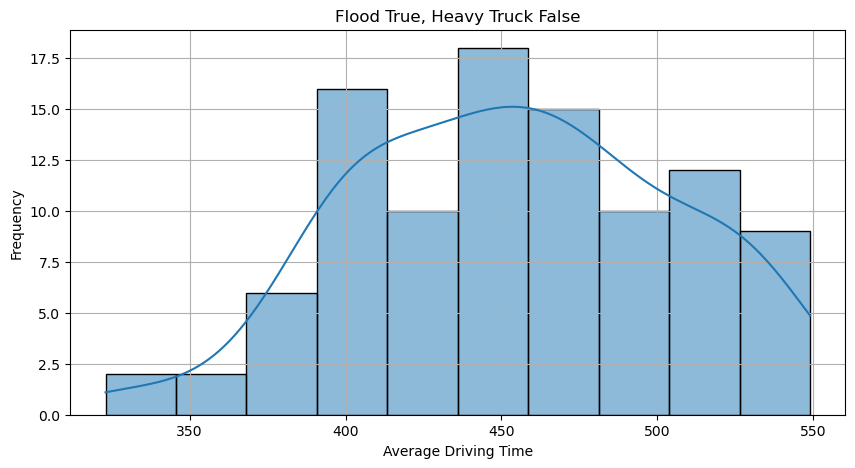

In [12]:
histoplot(df_flood, 'Flood True, Heavy Truck False')

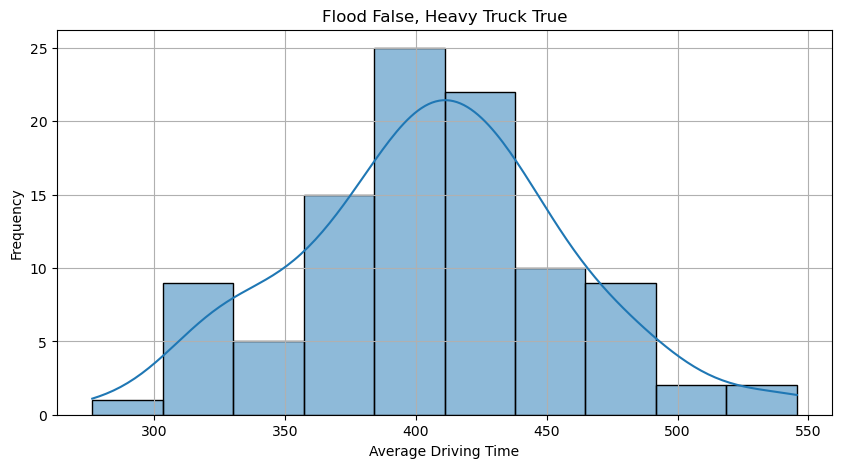

In [13]:
histoplot(df_ht, 'Flood False, Heavy Truck True')

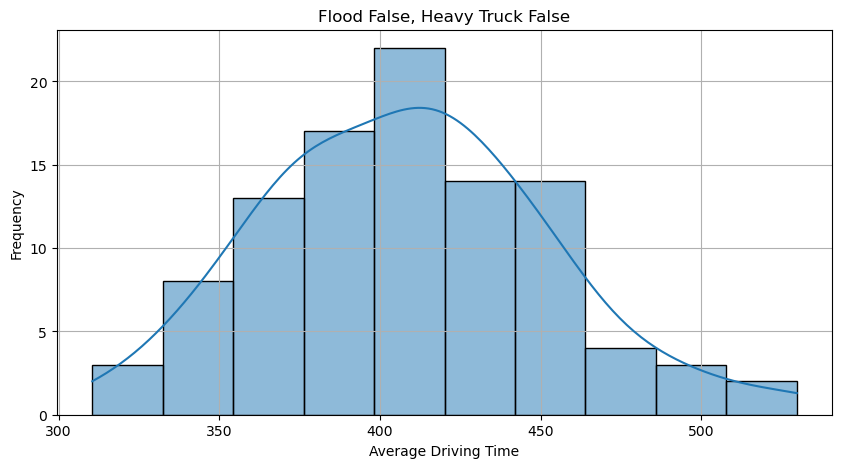

In [14]:
histoplot(df_1, 'Flood False, Heavy Truck False')

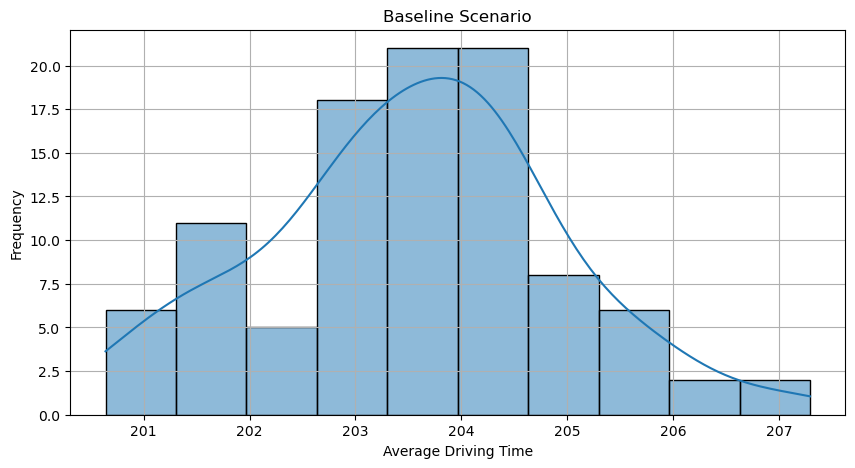

In [15]:
histoplot(df_0, 'Baseline Scenario')

In [9]:
# df['Average_driving_time] average
def average_driving_time(df):
    return df['Average_driving_time'].mean()

In [10]:
average_driving_time(df_flood), average_driving_time(df_ht), average_driving_time(df_1), average_driving_time(df_0)

(453.74118759044876, 407.0266420719449, 408.21777981068334, 203.537417963211)

In [21]:
df_flood['Delay dict'] = df_flood['Delay dict'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)
df_ht['Delay dict'] = df_ht['Delay dict'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)
df_1['Delay dict'] = df_1['Delay dict'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)
df_0['Delay dict'] = df_0['Delay dict'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)

In [22]:
def get_mean_delay_dict(df):
    bridge_delays = defaultdict(lambda: [0, 0])  # {bridge_id: [total_delay, count]}

    for delays in df['Delay dict']:
        if isinstance(delays, dict):  # Ensure it's a dictionary
            for bridge_id, delay in delays.items():
                bridge_delays[bridge_id][0] += delay  # Sum delay
                bridge_delays[bridge_id][1] += 1  # Count occurrences

    # Compute average delay
    average_delays = {bridge: total / count for bridge, (total, count) in bridge_delays.items()}
    return average_delays

In [25]:
flood_dict = get_mean_delay_dict(df_flood)
ht_dict = get_mean_delay_dict(df_ht)
one_dict = get_mean_delay_dict(df_1)
zero_dict = get_mean_delay_dict(df_0)

In [59]:
from collections import Counter

def get_most_popular_bridges(df):
    bridge_counts = Counter()

    # Ensure 'Delay dict' is properly formatted
    df['Delay dict'] = df['Delay dict'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)

    # Iterate over each row and count occurrences
    for delays in df['Delay dict']:
        if isinstance(delays, dict):  # Ensure it's a dictionary
            bridge_counts.update(delays.keys())

    # Get the 10 most common bridge IDs
    top_10_popular = [bridge for bridge, _ in bridge_counts.most_common(10)]

    return top_10_popular

In [60]:
flood_pop = get_most_popular_bridges(df_flood)
ht_pop = get_most_popular_bridges(df_ht)
one_pop = get_most_popular_bridges(df_1)
zero_pop = get_most_popular_bridges(df_0)

print(flood_pop)
print(ht_pop)
print(one_pop)
print(zero_pop)

['12941', '11066', '12519', '12562', '10858', '10222', '12969', '10166', '12556', '11607']
['10944', '10954', '10858', '11248', '12604', '12969', '11018', '12840', '11066', '12519']
['12941', '12840', '10954', '10858', '10944', '11018', '12604', '11248', '11066', '12969']
[]


In [61]:
set_flood = set(flood_pop)
set_ht = set(ht_pop)
set_1 = set(one_pop)

# Find objects that appear in more than one list
common_objects = (set_flood & set_ht) | (set_ht & set_1) | (set_flood & set_1)

# Print the result
print("Objects that appear in more than one list:", common_objects)

Objects that appear in more than one list: {'11066', '12519', '10954', '12969', '12604', '11018', '10944', '12840', '11248', '10858', '12941'}


In [32]:
def get_top_10_avg_delay(df):
    bridge_delays = defaultdict(lambda: [0, 0])  # {bridge_id: [total_delay, count]}

    # Ensure 'Delay dict' is properly formatted
    df['Delay dict'] = df['Delay dict'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)

    # Iterate through 'Delay dict' column
    for delays in df['Delay dict']:
        if isinstance(delays, dict):  # Ensure it's a dictionary
            for bridge_id, delay in delays.items():
                bridge_delays[bridge_id][0] += delay  # Sum delay
                bridge_delays[bridge_id][1] += 1  # Count occurrences

    # Compute average delay per bridge
    average_delays = {bridge: total / count for bridge, (total, count) in bridge_delays.items()}

    # Get the top 10 bridges with the highest average delay
    top_10_avg_delay = dict(sorted(average_delays.items(), key=lambda x: x[1], reverse=True)[:10])

    return top_10_avg_delay

In [33]:
flood_top_10 = get_top_10_avg_delay(df_flood)
ht_top_10 = get_top_10_avg_delay(df_ht)
one_top_10 = get_top_10_avg_delay(df_1)
zero_top_10 = get_top_10_avg_delay(df_0)
print(flood_top_10)
print(ht_top_10)
print(one_top_10)
print(zero_top_10)

{'10114': 224.01173834005206, '10546': 196.25821488253413, '11435': 194.5196005134798, '10468': 194.06258233758587, '10062': 192.53014144642495, '10060': 189.16747463982492, '10690': 188.76702298652273, '11481': 184.8278473491688, '12013': 182.0024795095996, '11465': 177.64105326826973}
{'11481': 205.62324827061906, '10062': 190.24195134019374, '10008': 187.22455728628756, '12109': 179.98002554454357, '10060': 179.30650689308462, '11465': 179.05774581921128, '10690': 176.1057594328908, '12013': 174.40816958651564, '11435': 172.31209892119998, '11543': 164.11881307945862}
{'10062': 195.60098328052547, '11435': 186.32040047988198, '10068': 179.49515431356414, '12013': 177.66861770394482, '11465': 177.54977700677497, '12109': 176.06654167108255, '10060': 173.50728686655998, '10690': 171.3526936733422, '10546': 160.29043336428782, '11543': 157.4180019579455}
{}


In [45]:
def plot_top_10_avg_delay_4(dicts, titles):
    """
    Plots top 10 average delay for 4 dictionaries in a 2x2 grid.

    Parameters:
    - dicts: List of 4 dictionaries, each containing bridge IDs as keys and average delay times as values.
    - titles: List of 4 titles for the subplots.
    """
    if len(dicts) != 4 or len(titles) != 4:
        raise ValueError("You must provide exactly 4 dictionaries and 4 titles.")

    fig, axes = plt.subplots(2, 2, figsize=(12, 8))
    axes = axes.flatten()

    for i, ax in enumerate(axes):
        top_10_dict = dicts[i]
        sns.barplot(x=list(top_10_dict.keys()), y=list(top_10_dict.values()), ax=ax)
        ax.set_title(titles[i])
        ax.set_xlabel('Bridge ID')
        ax.set_ylabel('Time (min)')
        ax.tick_params(axis='x', rotation=45)
        ax.grid()

    plt.tight_layout()
    plt.show()

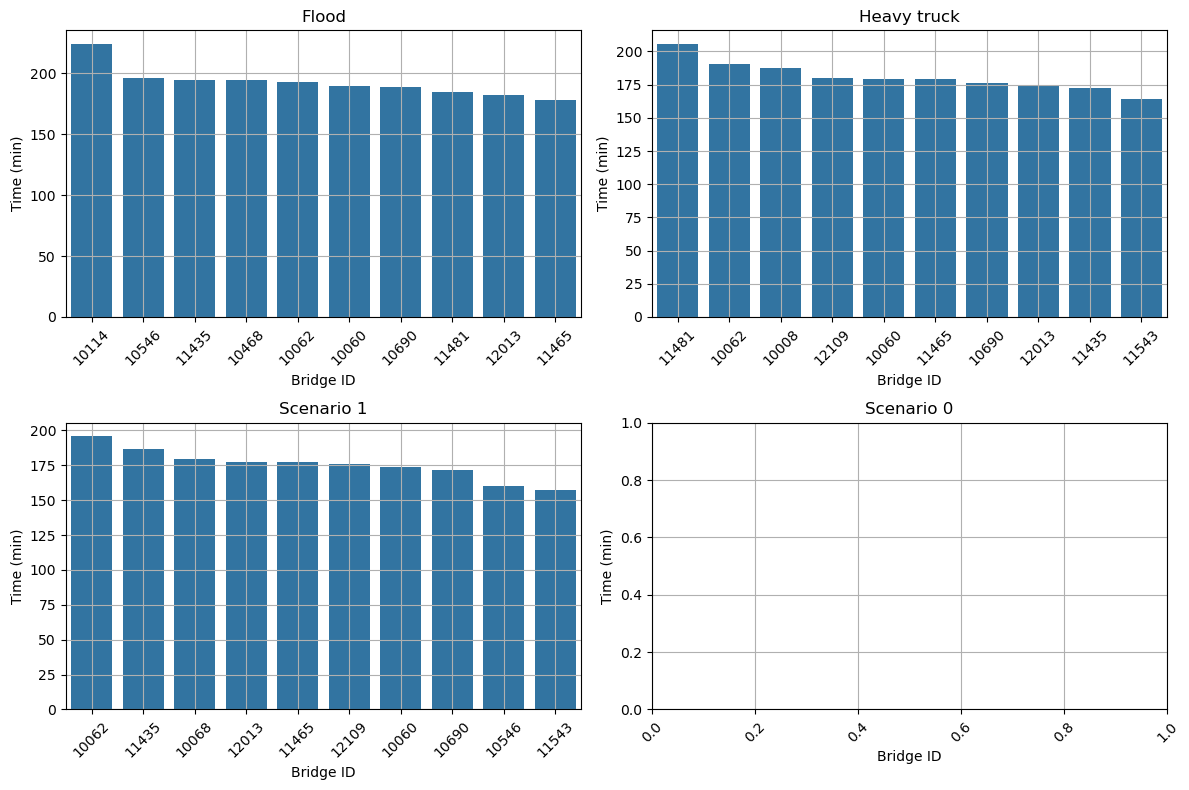

In [46]:
titles = ['Flood', 'Heavy truck', 'Scenario 1', 'Scenario 0']

# Call the function
plot_top_10_avg_delay_4([flood_top_10, ht_top_10, one_top_10, zero_top_10], titles)

In [34]:
def get_top_10_accumulation_delay(df):
    bridge_delays = defaultdict(float)  # {bridge_id: total_delay}

    # Ensure 'Delay dict' is properly formatted
    df['Delay dict'] = df['Delay dict'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)

    # Iterate through 'Delay dict' column
    for delays in df['Delay dict']:
        if isinstance(delays, dict):  # Ensure it's a dictionary
            for bridge_id, delay in delays.items():
                bridge_delays[bridge_id] += delay  # Accumulate total delay

    # Get the top 10 bridges with the highest accumulated delay
    top_10_accumulation_delay = dict(sorted(bridge_delays.items(), key=lambda x: x[1], reverse=True)[:10])

    return top_10_accumulation_delay

In [35]:
flood_accumulation = get_top_10_accumulation_delay(df_flood)
ht_accumulation = get_top_10_accumulation_delay(df_ht)
one_accumulation = get_top_10_accumulation_delay(df_1)
zero_accumulation = get_top_10_accumulation_delay(df_0)
print(flood_accumulation)
print(ht_accumulation)
print(one_accumulation)
print(zero_accumulation)

{'11543': 3436.766987260438, '11435': 3112.3136082156766, '10690': 3020.2723677843637, '12941': 2557.5490442930804, '12013': 2366.0322336247946, '11465': 2309.3336924875066, '11066': 2189.9969958647903, '12519': 2082.692171493342, '10954': 1845.5879491059602, '12840': 1785.2795595259686}
{'11465': 3760.212662203437, '10690': 3698.2209480907068, '12013': 3139.3470525572816, '10954': 2857.4163350654967, '11435': 2240.0572859756, '10944': 2097.869624625947, '11543': 1969.4257569535034, '11018': 1511.7763373280475, '10540': 1459.126878040701, '10034': 1418.5742731144646}
{'10954': 2776.5603965262294, '11435': 2235.844805758584, '10690': 2227.5850177534485, '12840': 2091.703956908428, '12013': 1954.354794743393, '12941': 1934.1413786184246, '11543': 1889.0160234953462, '10034': 1807.8088663514595, '12015': 1782.6445892638262, '11321': 1773.93430063086}
{}


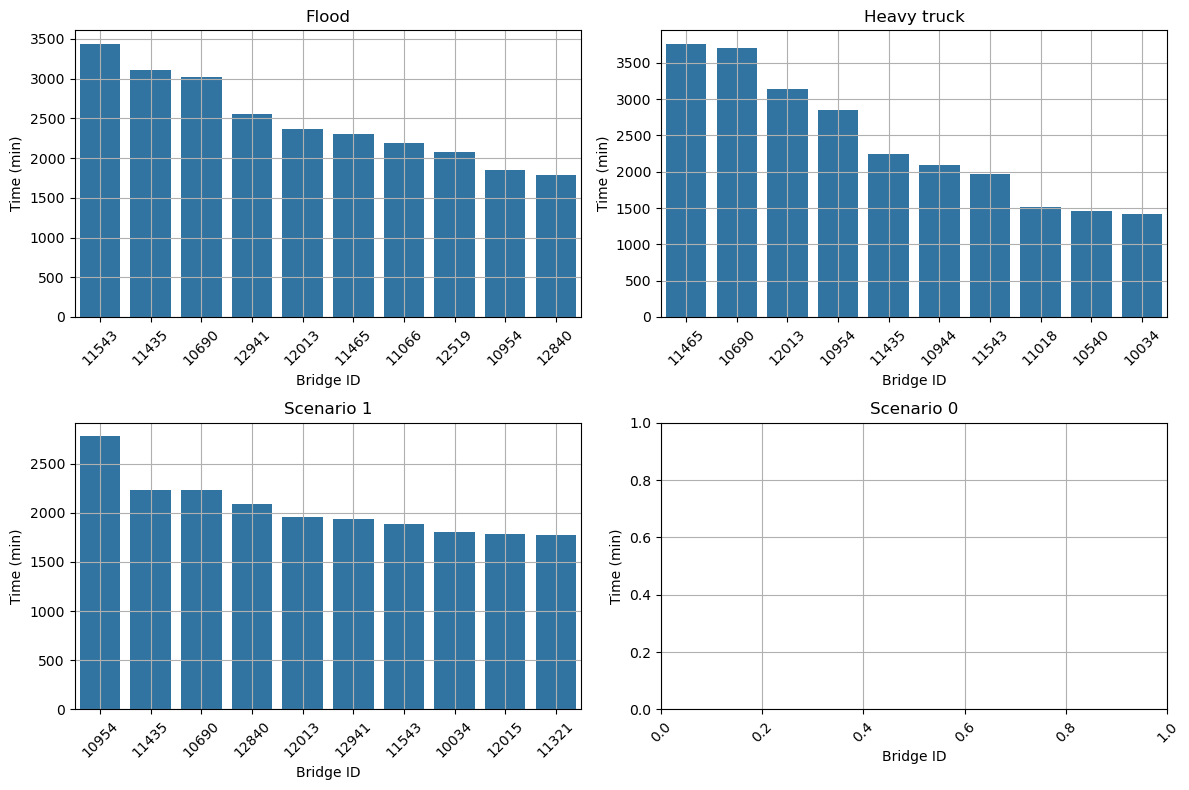

In [47]:
titles = ['Flood', 'Heavy truck', 'Scenario 1', 'Scenario 0']

# Call the function
plot_top_10_avg_delay_4([flood_accumulation, ht_accumulation, one_accumulation, zero_accumulation], titles)